# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 
Ημερομηνία εκφώνησης της άσκησης: 23 Νοεμβρίου 2020



# Στοιχεία Ομάδας

**Αριθμός Ομάδας:** 66

**Ονοματεπώνυμα και ΑΜ:**

Τσιλιβής Θεόδωρος 03116032

Στόικου Θεοδότη 03117085

Ποταμίτου Νεφέλη 03117709

# Εισαγωγή του Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib

     |████████████████████████████████| 1.5MB 7.0MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 1.4 MB 6.0 MB/s 
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434676 sha256=f1109367039215a76c50993b21952203bc2c3ae8f9fa5bad9cbbaa505d8cf278
  Stored in directory: /root/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 22.2 MB 1.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με περίπου 40.000 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [ ]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

Κάθε ομάδα θα δουλέψει σε ένα μοναδικό υποσύνολο 5.000 ταινιών (διαφορετικό dataset για κάθε ομάδα) ως εξής

1. Κάθε ομάδα έχει έναν αριθμό "seed" (φύτρο) που είναι ο ίδιος με τον αριθμό της ομάδας σας: θα τον βρείτε στην κολόνα Α/Α [εδώ](https://docs.google.com/spreadsheets/d/1CD6AtX7YnocXceCELl_XJ06kyRr0YQPhor8dpw012t0/edit?usp=sharing).

2. Το data frame `df_data_2` έχει γραμμές όσες και οι ομάδες και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. 

3. Στο επόμενο κελί αλλάξτε τη μεταβλητή `team_seed_number` με το Seed της ομάδας σας.

4. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.

In [ ]:
import numpy as np

# βάλτε το seed που αντιστοιχεί στην ομάδα σας
team_seed_number = 66

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1EA_pUIgK5Ub3kEzFbFl8wSRqAV6feHqD"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=99` (την εκατοστή) θα γράψουμε `print(corpus[99])`.

In [ ]:
ID = 99
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['A Lonesome, Final Battle: The Father of Z-Warrior Son Gokū, who Challenged Freeza']
['"Science Fiction",  "Japanese Movies",  "World cinema",  "Animation",  "Anime",  "Fantasy",  "Children\'s",  "Animated cartoon",  "Action"']
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="70%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 


## Preproccessing:

Από τα αποτελέσματα που λαμβάναμε στην συνέχεια παρατηρήσαμε την ανάγκη να κάνουμε μια προεπεξεργασία στα δεδομένα μας. Γι αυτό τον λόγο αφαιρέσαμε όλα τα ονόματα από τις περιγραφές ταινιών καθώς και ορισμένες λέξεις που χρησιμοποιούνται συχνά στην περιγραφή ταινιών όπως π.χ. movie, film, plot etc, οι οποίες δεν είναι χαρακτηριστικά που διαφοροποιούν τη μια ταινία από την άλλη.
 


In [ ]:
!pip install names-dataset
from names_dataset import NameDataset
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stopwords_english
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

     |████████████████████████████████| 1.4 MB 5.0 MB/s 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
m = NameDataset()
movie_words = ["movie", "film", "plot", "begins", "opens", "starts", "piece", "named", "woman", "women", "man", "men", "prologue", "help", "helping"]
stop_words = []
for i in range(5000):
    title = word_tokenize(corpus[i])
    titlecopy = []
    for word in title:
        if (m.search_first_name(word) or m.search_last_name(word) ) and word not in stop_words:
            stop_words.append(word)

In [ ]:
stop = list(stop_words) + list(movie_words)

## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)

Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης. Ανατρέξτε στα notebooks του εργαστηρίου και στο [FAQ](https://docs.google.com/document/d/1hou1gWXQuHAB7J2aV44xm_CtAWJ63q6Cu1V6OwyL_n0/edit?usp=sharing) των ασκήσεων.


In [ ]:
print(corpus_tf_idf.shape)

(5000, 48480)


## Υλοποίηση του συστήματος συστάσεων

Το σύστημα συστάσεων που θα παραδώσετε θα είναι μια συνάρτηση `content_recommender` με δύο ορίσματα `target_movie` και `max_recommendations`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, από το `corpus_tf_idf` υπολογίστε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), id, τίτλο, σύνοψη, κατηγορίες (categories)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def content_recommender(target_movie,max_recommendations,corpus_tf_idf,titles,corpus,categories):
    cos = cosine_similarity(corpus_tf_idf[target_movie],corpus_tf_idf).reshape(5000)
    print(target_movie,titles[target_movie],categories[target_movie],corpus[target_movie])
    indexes = np.argsort(cos)[::-1]
    for movie in range(max_recommendations):
        index = indexes[movie+1]
        print(movie+1, index, round(cos[index],4), titles[index],categories[index] ,corpus[index])
    return

content_recommender(0,5,corpus_tf_idf,titles,corpus,categories)

0 ['The Busy Body'] ['"Crime Fiction",  "Screwball comedy",  "Indie",  "Comedy"'] George Norton is a low-level bumbler who works for Chicago crime boss Charley Barker. A well-dressed mama's boy, George is in good standing with Barker, even gaining a promotion, until an incident that costs the mob a million dollars. George is indirectly responsible when Archie, a mob courier, is killed at a barbecue. After the funeral, Barker instructs George to dig up Archie's body because $500,000 was stuffed inside the lining of each side of a blue suit that an unwitting George personally chose for the burial. George opens the casket to find it empty, then later occupied by a different corpse. He sets out to retrieve the body and the money before Barker gets angry enough to arrange a funeral for HIM.
1 4222 0.3159 ["It's a Wonderful Life"] ['"Drama",  "Family Film",  "Fantasy"']  In Bedford Falls, New YorkAlthough assumed to be in New York State, the script only identifies the fictional Bedford Falls

## Βελτιστοποίηση

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε τη για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. Μπορείτε επίσης να βελτιστοποιήσετε τη συνάρτηση παρατηρώντας πολλά φαινόμενα που το σύστημα εκλαμβάνει ως ομοιότητα περιεχομένου ενώ επί της ουσίας δεν είναι επιθυμητό να συνυπολογίζονται (δείτε σχετικά το [FAQ](https://docs.google.com/document/d/1hou1gWXQuHAB7J2aV44xm_CtAWJ63q6Cu1V6OwyL_n0/edit?usp=sharing)). Ταυτόχρονα, μια άλλη κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων. 




Για την βελτιστοποιήση της δομής Tf-idf χρησιμοποιήσαμε μερικές από τις built-in παραμέτρους της υλοποίησης Tf-idf του scikit learn. Συγκεκριμένα πειραμτιστήκαμε με τις παραμέτρους:

*   max_df (άνω φράγμα ποσοστού εμφάνισης μιας λέξης πέραν το οποίου η λέξη δεν υπολογίζεται) 
*   max_features (μέγιστος αριθμός χαρακτηριστικών στο τέλος της διεργασίας)
*   min_df = (ελάχιστος αριθμός εμφανίσεων μιας λέξης ώστε να συμπεριληφθεί στην ανάλυση)
*   stop_words = (λέξεις που επιθυμούμε να αγνοήσουμε με βάση το preproccesssing)

Δοκιμάζοντας τις παραμέτρους για διάφορες τιμές καταλήξαμε στις εξής τιμές που μας ικανοποιούν. Πιθανώς αυτές δεν είναι βέλτιστες, καθώς τα κριτήρια με βάση τα οποία καταλήξαμε σε αυτές είναι υποκειμενικά.

## Επεξήγηση επιλογών και ποιοτική ερμηνεία

Σε markdown περιγράψτε πώς προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`. Επίσης σε markdown δώστε 10 παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (5 και παραπάνω) και σημειώστε συνοπτικά ποια είναι η θεματική που ενώνει τις ταινίες.

Δείτε [εδώ](https://pastebin.com/raw/ZEvg5t3z) ένα παράδειγμα εξόδου του βελτιστοποιημένου συστήματος συστάσεων για την ταίνία ["Q Planes"](https://en.wikipedia.org/wiki/Q_Planes) με την κλήση της συνάρτησης για κάποιο seed `content_recommender(529,3)`. Είναι φανερό ότι η κοινή θεματική των ταινιών είναι τα αεροπλάνα, οι πτήσεις, οι πιλότοι, ο πόλεμος.

Η ταινία που χρησιμοποιήσαμε ως γνώμονα για την βελτιστοποίηση ήταν η Shrek the Third. Ξεκινήσαμε λαμβάνοντας σχετικά καλά αποτελέσματα και στο τελός πετύχαμε και οι 10 ταινίες να είναι αρκετά καλές προτάσεις (με γνώμονα την πλοκή).

In [ ]:
def tf_idf(corpus):

    vectorizer = TfidfVectorizer(sublinear_tf = True, max_df=.5, min_df = 10, stop_words = stop)
    vectorizer.fit(corpus)
    corpus_tf_idf = vectorizer.transform(corpus)
    return corpus_tf_idf

corpus_tf_idf = tf_idf(corpus)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aadhi', 'aadil', 'aakash', 'aamina', 'aamir', 'aaron', 'aarons', 'aarthi', 'aarti', 'aarya', 'aaya', 'aayush', 'abagail', 'abasi', 'abbas', 'abbott', 'abby', 'abdel', 'abdul', 'abdullah', 'abe', 'abel', 'abelard', 'abercromby', 'abernathy', 'abhay', 'abhilash', 'abhilasha', 'abhinay', 'abhir', 'abhiram', 'abi', 'abid', 'abigail', 'abilene', 'abinash', 'abirami', 'abner', 'abou', 'abra', 'abraham', 'abramovitz', 'abrams', 'abrar', 'abrecht', 'abu', 'aburto', 'aca', 'aces', 'achilles', 'ackerman', 'ackerson', 'adam', 'adamson', 'adarsh', 'addie', 'addis', 'addison', 'addy', 'ade', 'adel', 'adela', 'adelaide', 'adele', 'adeline', 'adi', 'adil', 'aditi', 'aditya', 'adler', 'adolf', 'adolph', 'adolphe', 'adrian', 'adriana', 'adrianna', 'adriano', 'adrien', 'aero', 'aesir', 'afaq', 'afzal', 'aga',

- Ταινία #1369 Shrek the Third

  Στις προτεινόμενες ταινίες βλέπουμε συχνή αναφορά σε λέξεις κλειδία όπως prince, kingdom,  glory, gentleman, knights κλπ.

In [ ]:
content_recommender(1369, 10, corpus_tf_idf, titles, corpus, categories)

1369 ['Shrek the Third'] ['"Adventure",  "Children\'s/Family",  "Fairy tale",  "Animation",  "Fantasy",  "Children\'s Fantasy",  "Family Film",  "Fantasy Comedy",  "Comedy"'] Prince Charming now performs inside a stage in a bar, vowing that he'll become King of Far, Far Away. Meanwhile, King Harold is dying and his ogre son-in-law Shrek and daughter Princess Fiona are next in line to be King and Queen of Far Far Away. Shrek, who is having considerable difficulty serving as Regent during the King's medical leave, insists that an ogre as king is a bad idea and that there has to be someone else for the job. Before dying, Harold tells Shrek that there is another heir: his nephew, Arthur Pendragon. Meanwhile, Prince Charming has gone to the Poison Apple tavern where he encounters a variety of fairy tale villains consisting of Captain Hook, the Evil Queen, Rumpelstiltskin, a Cyclops, the Headless Horseman, the Puppet Master, assorted outlaws, black knights, pirates, malevolent trees, evil Dw

- Ταινία #85 Love at Stake

  Στις προτεινόμενες ταινίες βλέπουμε ταινίες με romance σε κολλέγιο και εν γένει teen romance .

In [ ]:
content_recommender(85, 9, corpus_tf_idf, titles, corpus, categories)

85 ['Love at Stake'] ['"Parody",  "Satire",  "Comedy"'] Miles Campbell, recent graduate of a Christian divinity university, arrives in Salem, Massachusetts to become the local parson's assistant. He meets with his childhood sweetheart, baker Sara Lee, and plans to marry her. Meanwhile, greedy Judge Samuel John arrives to meet with idiotic Mayor Upton to discuss plans for a  Mall for Salem. To acquire the necessary real estate they hatch a scheme to accuse certain villagers of witchcraft. When the accused are tried, convicted and burned, their land can be confiscated. The plan is succeeding, as the villagers, egged on by the parson's shrewish mother, enthusiastically accept the Judge's message. Then saucy Faith Stewart  arrives from London for Thanksgiving with her cousins. Faith falls for Miles and accuses Sara of witchcraft. Miles must prove Sara's innocence before she is burned at the stake.
1 1633 0.147 ['Super Sweet 16: The Movie'] ['"Comedy",  "Teen",  "Television movie"'] The fil

- Ταινία #372 Two Tickets to Paradise

  Στις προτεινόμενες ταινίες βλέπουμε ταινίες στις οποίες πρωταγωνιστούν μεγάλες ομάδες φίλων .

In [ ]:
number = np.where(titles =='Two Tickets to Paradise')[0][0]
content_recommender(number, 5, corpus_tf_idf, titles, corpus, categories)

372 ['Two Tickets to Paradise'] ['"Road movie",  "Comedy-drama",  "Indie",  "Comedy"'] The story revolves around three lifelong friends from Pennsylvania in their late 30s who go on a road trip in search of themselves. Most of the movie contains scenes from Interstate 95; the friends have tickets to a major college bowl game in Florida. Along the way, the friends run into a few surprises.
1 2348 0.1658 ['The Book of Caleb'] ['"Comedy",  "Indie"'] College dropout Caleb Callahan  has just returned home. Searching for direction and meaning in his life, Caleb embarks on a series of pranks with his lifelong friends Montag  and Swank . Along the way, the friends must deal with an old foe out for vengeance , a corrupt mayor , and Caleb's new girlfriend . To become the hero he was meant to be, Caleb must step up and face all these challenges.
2 3677 0.1501 ['Lucky 13'] ['"Romantic comedy",  "Romance Film",  "Comedy"'] This film is about Zach Baker  and his quest to go back through his past exp

- Ταινία #660 332 Mumbai To India

  Όλες οι προτινόμενες ταινίες διαδραματίζονται στην Ινδία.

In [ ]:
number = np.where(titles =='332 Mumbai To India')[0][0]
content_recommender(number, 5, corpus_tf_idf, titles, corpus, categories)

660 ['332 Mumbai To India'] ['"Thriller"'] The film is about a mislead youth who commits a stupid crime just to prove a point. But there are repercussions on the general public and people connected to him. How will the Government tackle this issue and what can they do to keep it from happening again.332 Mumbai To India Movie Preview - Bollywood Hungama
1 4331 0.1333 ['Shubhayathra'] ['"Drama"'] Vishnu and Arundhathi, working in Mumbai, meet each other at their common friend, Ramettan's house. They fall in love at first sight and get married. The film is their struggle to lead a family life and to find an accommodation in a city like Mumbai.
2 2232 0.1277 ['Hawayein'] ['"Historical Epic",  "Drama"'] "Hawayein-Winds Change But The Scars Of History Remain" is a film which emerges from the consequences of the Operation Blue Star & is based on the aftermath of Indira Gandhi’s assassination and the nationwide 1984 Anti-Sikh riots & the subsequent victimization of the people in Punjab  in the

- Ταινία #957 A Wicked Ghost

  Οι ταινίες που προτείνονται περιλαμβάνουν φαντάσματα και τέρατα.

In [ ]:
number = np.where(titles =='A Wicked Ghost')[0][0]
content_recommender(number, 10, corpus_tf_idf, titles, corpus, categories)

957 ['A Wicked Ghost'] ['"Horror",  "Chinese Movies"'] Ming's four friends - Annie, Rubbish, Big-B and Biggie - play a game of "contacting ghosts". They mix their blood in a bowl of water and each of them drinks from it, so that their minds will be "connected" as they inhale fumes from the burning of oil secreted from a dead body. During the game, Ming, who does not participate and has the ability to see spirits, sees a female ghost with long hair and dressed in blue. He interrupts the game, much to everyone's unhappiness. Rubbish goes to the bathroom but a while later he dashes out in fear, saying that he saw a ghost. Ming and the others go into the bathroom and see Rubbish submerged inside the bathtub. They are horrified and confused, and see Rubbish approaching from outside the bathroom. They cower in fear and look back at the bathtub, which is now empty. They rush outside into the living room and see Rubbish lying dead on the floor, his face contorted into an expression of fear. Mi

- Ταινία #1148 Terror-Creatures from the Grave

  Όλες οι ταινίες έχουν μεγάλα κομμάτια τους που διαδραματίζονται σε κάστρα.

In [ ]:
number = np.where(titles =='Terror-Creatures from the Grave')[0][0]
content_recommender(number, 10, corpus_tf_idf, titles, corpus, categories)

1148 ['Terror-Creatures from the Grave'] ['"Zombie Film",  "B-movie",  "Horror",  "Supernatural"'] An attorney arrives at a castle to settle the estate of its recently deceased owner. The owner's wife and daughter reveal that he was someone who was able to summon the souls of ancient plague victims and, in fact, his spirit was roaming the castle at that very moment. Soon occupants of the castle begin to die off in gruesome, violent ways.
1 323 0.2757 ['Castle in the Air'] ['"Musical",  "Drama"'] The English owner of a Scottish castle discovers that it is haunted by the spirit of a beautiful woman. He decides to use the ghost as a tourist attraction for his castle.
2 2658 0.1423 ['The Hot Scots'] ['"Short Film",  "Comedy",  "Black-and-white"'] The Stooges are wannabe detectives who inadvertently get their chance to crack a case in Scotland. Dressed in kilts and talking in phony Scottish accents, the Stooges  are given the task of guarding the prized possessions of The Earl of Glenheathe

- Ταινία #1352 Winnie the Pooh: Seasons of Giving

  Όλες οι ταινίες είναι animation και απευθύνονται κυρίως σε παιδιά.

In [ ]:
number = np.where(titles =='Winnie the Pooh: Seasons of Giving')[0][0]
content_recommender(number, 5, corpus_tf_idf, titles, corpus, categories)

1352 ['Winnie the Pooh: Seasons of Giving'] ['"Children\'s Fantasy",  "Holiday Film",  "Children\'s/Family"'] The film begins with Tigger wanting to ski, but Winnie the Pooh and Piglet point out that there's no snow. So, they go ask Rabbit what day of the year it is. Rabbit's calendar pages blow away, but he doesn't realize it, and claims that it's February 2,, Groundhog Day. In an effort to find out if there are two more weeks of winter or if spring comes tomorrow, they ask Gopher if he sees his shadow. Gopher angrily points out he's a gopher not a groundhog, so they have Piglet pretend to be a groundhog. He can't see through his mask, so they all prepare for spring by airing out their houses, planting gardens and spring cleaning. But, later that day, it snows. Rabbit confronts Piglet and tells him that it's all his fault, and goes home to see that his calendar pages are on the floor, and realizes that it's not Groundhog Day, it's only November 13,. Feeling awful for what he said, Rab

- Ταινία #1853 Red riding Hood

  Όλες οι ταινίες που προτείνονται είναι τρόμου - thriller και συμμετέχουν σε αυτές λύκοι και τέρατα (wolf, monsters εμφανίζονται ως keywords).

In [ ]:
number = np.where(titles =='Red Riding Hood')[0][0]
content_recommender(number, 5, corpus_tf_idf, titles, corpus, categories)

1853 ['Red Riding Hood'] ['"Thriller",  "Horror",  "Supernatural",  "Mystery",  "Fantasy",  "Drama",  "Romantic drama",  "Romance Film"'] Valerie is a young woman who lives in the village of Daggerhorn, on the edge of a forest plagued by a werewolf, with her parents, Cesaire and Suzette, and older sister Lucie. She is in love with the woodcutter Peter, but her parents have arranged for her to marry Henry Lazar, son of the wealthy blacksmith Adrian Lazar. Valerie and Peter plan to run away together, only to learn that the Wolf has broken its truce not to prey on the townspeople in exchange for cattlestock sacrifices and has murdered Lucie, who is revealed to have had a crush on Henry Lazar. Suzette learns of Peter and Valerie's love, telling Valerie she too did not love her husband at first, but learned to love him - that she had loved another. Father August, the local preacher, calls the famous witch hunter Father Solomon to help them, but the townspeople decide to venture into the Wol

- Ταινία #2601 Santa with Muscles

  Όπως είναι αναμενόμενο όλες οι προτινόμενες ταινίες είναι χριστουγεννιάτικες.

In [ ]:
number = np.where(titles =='Santa with Muscles')[0][0]
content_recommender(number, 10, corpus_tf_idf, titles, corpus, categories)

2601 ['Santa with Muscles'] ['"Comedy of Errors",  "Comedy",  "Children\'s/Family"'] Blake , is a self-made millionaire from selling bodybuilding supplements, and is mean to his workers. One day, whilst on the way to a paintball game, he is driving recklessly in his car. Chased by the police, he drives to a shopping mall and hides out inside, changing into a Santa Claus costume. He slides down a garbage chute to escape the police and bangs his head, getting amnesia. Mistaken by Lenny  as the mall Santa, Blake begins to think he is Santa Claus. Meanwhile, Ebner Frost , an evil scientist, is trying to take over an orphanage in order to gain access to the magical crystals underneath it. Frost dispatches his henchmen to destroy the orphanage, and only Blake can save the orphan children.
1 336 0.2384 ['Super Sleuth Christmas Movie'] ['"Family Film",  "Children\'s",  "Animation"'] It's Christmas Eve, and Pooh and his friends from the Hundred Acre Wood are waiting that night. But now they hav

- Ταινία #4543 Soccer Mom

  Σε όλες τις ταινιές συμπεριλαμβάνεται κάποια συσχσέτιση με το ποδόσφαιρο και εν γένει τον αθλητισμό.

In [ ]:
number = np.where(titles =='Soccer Mom')[0][0]
content_recommender(number, 5, corpus_tf_idf, titles, corpus, categories)

4543 ['Soccer Mom'] ['"Sports",  "Family Film",  "Comedy",  "Teen"'] A warm-hearted comedy about a compulsive soccer mom who masquerades as a famous Italian soccer star hired to coach her daughter's floundering soccer team, then struggles frantically to keep her wacky charade going long enough to see the girls win their big tournament
1 46 0.1791 ['France-Brésil et autres histoires'] ['"Short Film",  "Drama"'] On July 1, 2006, during the Soccer World Cup, an illegal immigrant is detained and deported with his daughter, strongly contrasting with the glorification of a united and multicoloured France.
2 1107 0.1733 ['Sex with a Smile'] ['"Comedy film"'] An Italian anthology film sex comedy that features a series of five short comedic sketches that parody Italian sexual mores.
3 3445 0.1364 ['Above the Rim'] ['"Sports",  "Crime Fiction",  "Melodrama",  "Drama"'] A young athlete aspiring to become a professional basketball player must make some tough decisions in this sports melodrama. Kyl

## Tip: persistence αντικειμένων με joblib.dump

H βιβλιοθήκη [joblib](https://pypi.python.org/pypi/joblib) της Python δίνει κάποιες εξαιρετικά χρήσιμες ιδιότητες στην ανάπτυξη κώδικα: pipelining, παραλληλισμό, caching και variable persistence. Τις τρεις πρώτες ιδιότητες τις είδαμε στην πρώτη άσκηση. Στην παρούσα άσκηση θα μας φανεί χρήσιμη η τέταρτη, το persistence των αντικειμένων. Συγκεκριμένα μπορούμε με:

```python
joblib.dump(my_object, 'my_object.pkl') 
```

να αποθηκεύσουμε οποιοδήποτε αντικείμενο-μεταβλητή (εδώ το `my_object`) απευθείας πάνω στο filesystem ως αρχείο, το οποίο στη συνέχεια μπορούμε να ανακαλέσουμε ως εξής:

```python
my_object = joblib.load('my_object.pkl')
```

Μπορούμε έτσι να ανακαλέσουμε μεταβλητές ακόμα και αφού κλείσουμε και ξανανοίξουμε το notebook, χωρίς να χρειαστεί να ακολουθήσουμε ξανά όλα τα βήματα ένα - ένα για την παραγωγή τους, κάτι ιδιαίτερα χρήσιμο αν αυτή η διαδικασία είναι χρονοβόρα.

Ας αποθηκεύσουμε το `corpus_tf_idf` και στη συνέχεια ας το ανακαλέσουμε.

In [ ]:
import joblib

joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl') 

['corpus_tf_idf.pkl']



Μπορείτε με ένα απλό `!ls` να δείτε ότι το αρχείο `corpus_tf_idf.pkl` υπάρχει στο filesystem σας (== persistence):

In [ ]:
!ls -lh

total 6.7M
-rw-r--r-- 1 root root 6.7M Dec 30 09:47 corpus_tf_idf.pkl
drwxr-xr-x 1 root root 4.0K Dec 21 17:29 sample_data


και μπορούμε να τα διαβάσουμε με `joblib.load`

In [ ]:
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM
<img src="https://i.imgur.com/Z4FdurD.jpg" width="60%">

30000

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους (ο παραπάνω χάρτης είναι ενδεικτικός, δεν αντιστοιχεί στο dataset μας). 

Η `build_final_set` αρχικά μετατρέπει την αραιή αναπαράσταση tf-idf της εξόδου της `TfidfVectorizer()` σε πυκνή (η [αραιή αναπαράσταση](https://en.wikipedia.org/wiki/Sparse_matrix) έχει τιμές μόνο για τα μη μηδενικά στοιχεία). 

Στη συνέχεια ενώνει την πυκνή `dense_tf_idf` αναπαράσταση και τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον στήλες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά του TFIDF και τις κατηγορίες της.

Τέλος, δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM.

In [ ]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομένα σε float32
    return np.array(final_set, dtype=np.float32)

In [ ]:
final_set = build_final_set()

Τυπώνουμε τις διαστάσεις του τελικού dataset μας. Χωρίς βελτιστοποίηση του TFIDF θα έχουμε περίπου 50.000 χαρακτηριστικά.

In [ ]:
print(final_set.shape)
print(corpus_tf_idf.shape)

(5000, 8319)
(5000, 7997)


Τυπωνουμε τις (μη μηδενικες) τιμες ενος στοιχειου του final_set για να δουμε τι περιεχει.

In [ ]:
for i in range(len(final_set[0])):
    if final_set[0][i]!=0:
        print(final_set[0][i])

0.10749379
0.14984545
0.04291924
0.102448784
0.13688928
0.17413183
0.06962201
0.059271056
0.12316395
0.14363553
0.103616975
0.08786922
0.15696876
0.13307233
0.16027515
0.12396708
0.16027515
0.16550738
0.09712976
0.10122439
0.15228294
0.13830458
0.12508012
0.07398541
0.117744274
0.0950983
0.07490601
0.059531804
0.20156543
0.14908351
0.32090074
0.06486626
0.08310272
0.11312421
0.17628632
0.08831653
0.14494708
0.04266286
0.07057983
0.06058212
0.13346852
0.12369647
0.12316395
0.21635714
0.07524598
0.17413183
0.14370877
0.044264305
0.15228294
0.14984545
0.11420094
0.11882571
0.09640411
0.094429046
0.11732458
0.16550738
0.1322985
0.05264147
0.07605789
0.04491493
0.05131878
0.07366221
0.09061211
1.0
1.0
1.0
1.0


Με βάση την εμπειρία σας στην προετοιμασία των δεδομένων στην επιβλεπόμενη μάθηση, υπάρχει κάποιο βήμα προεπεξεργασίας που θα μπορούσε να εφαρμοστεί σε αυτό το dataset; 

Θα μπορούσε να εφαρμοστεί PCA η κάποια άλλη μέθοδος μείωσης διαστάσεων πριν εκπαιδεύσουμε τον χάρτη SOM.

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [ ]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

     |████████████████████████████████| 6.1 MB 4.2 MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp36-cp36m-linux_x86_64.whl size=420943 sha256=116fbea681af3ab5f4ce165d401a9f0c7185a3d6746266af5a27766cdee8e339
  Stored in directory: /root/.cache/pip/wheels/69/4c/18/b5f05a068134b3d70d4060a06d2cd9080fa21084dc876f51e3
Successfully built somoclu


Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. Ενδεικτικά, με σωστή κωδικοποίηση tf-idf, μικροί χάρτες για λίγα δεδομένα (1000-2000) παίρνουν γύρω στο ένα λεπτό ενώ μεγαλύτεροι χάρτες με όλα τα δεδομένα μπορούν να πάρουν 10-15 λεπτά ή και περισσότερο.


In [ ]:
n_rows, n_columns = 30,30
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
epochs = 100
filename = '/content/drive/MyDrive/30x30som.pkl'

In [ ]:
import joblib

som = joblib.load(filename)

Ο χρονος εκπαίδευσης του μεγάλου map (30x30 με 100 εποχες και ολο το dataset)

In [ ]:
# %time som.train(final_set, epochs=epochs)
# joblib.dump(som, filename) 

CPU times: user 3h 42min 12s, sys: 23.7 s, total: 3h 42min 36s
Wall time: 1h 53min 10s


['/content/drive/MyDrive/30x30som.pkl']


## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


In [ ]:
bmus = som.bmus
print(bmus.shape)
print(bmus)
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)

(5000, 2)
[[ 9 11]
 [24 21]
 [14 17]
 ...
 [13 24]
 [ 1 28]
 [26 26]]


In [ ]:
print(ubmus[:100].shape)
print(ubmus[:100])

(100, 2)
[[ 0  0]
 [ 0  1]
 [ 0  2]
 [ 0  3]
 [ 0  5]
 [ 0  6]
 [ 0  7]
 [ 0  8]
 [ 0  9]
 [ 0 10]
 [ 0 11]
 [ 0 12]
 [ 0 13]
 [ 0 14]
 [ 0 15]
 [ 0 16]
 [ 0 17]
 [ 0 18]
 [ 0 19]
 [ 0 20]
 [ 0 21]
 [ 0 22]
 [ 0 23]
 [ 0 24]
 [ 0 25]
 [ 0 26]
 [ 0 27]
 [ 0 28]
 [ 0 29]
 [ 1  0]
 [ 1  2]
 [ 1  3]
 [ 1  5]
 [ 1  6]
 [ 1  7]
 [ 1  8]
 [ 1  9]
 [ 1 10]
 [ 1 11]
 [ 1 12]
 [ 1 13]
 [ 1 14]
 [ 1 15]
 [ 1 16]
 [ 1 17]
 [ 1 18]
 [ 1 19]
 [ 1 20]
 [ 1 22]
 [ 1 24]
 [ 1 25]
 [ 1 26]
 [ 1 28]
 [ 1 29]
 [ 2  0]
 [ 2  3]
 [ 2  4]
 [ 2  5]
 [ 2  6]
 [ 2  7]
 [ 2  8]
 [ 2  9]
 [ 2 10]
 [ 2 11]
 [ 2 12]
 [ 2 13]
 [ 2 14]
 [ 2 15]
 [ 2 16]
 [ 2 17]
 [ 2 18]
 [ 2 19]
 [ 2 20]
 [ 2 21]
 [ 2 23]
 [ 2 24]
 [ 2 26]
 [ 2 27]
 [ 2 28]
 [ 2 29]
 [ 3  0]
 [ 3  1]
 [ 3  3]
 [ 3  4]
 [ 3  6]
 [ 3  7]
 [ 3  8]
 [ 3  9]
 [ 3 10]
 [ 3 11]
 [ 3 12]
 [ 3 13]
 [ 3 14]
 [ 3 15]
 [ 3 16]
 [ 3 17]
 [ 3 18]
 [ 3 21]
 [ 3 23]
 [ 3 25]]


In [ ]:
print(len(indices))
print(indices)

5000
[222 552 335 ... 318  52 590]


In [ ]:
print(np.where(indices==0))

(array([  26,  615,  695,  901,  971, 1051, 1140, 1145, 1469, 1485, 1541,
       1785, 1821, 1843, 1924, 2206, 2354, 2696, 2748, 3202, 3424, 3667,
       3728, 4123, 4290, 4480, 4538, 4938, 4990, 4994]),)



## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.


In [ ]:
from sklearn.cluster import KMeans
n_cluster = 25
algorithm = KMeans(n_clusters=n_cluster)
som.cluster(algorithm=algorithm)


## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.


In [ ]:
# filename = 'som' + str(n_rows) + 'x' + str(n_columns) + '@' + str(epochs) + 'e.pkl'
# joblib.dump(som, filename, compress = True)

['som10x10@100e.pkl']


## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Μην τυπώνετε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">



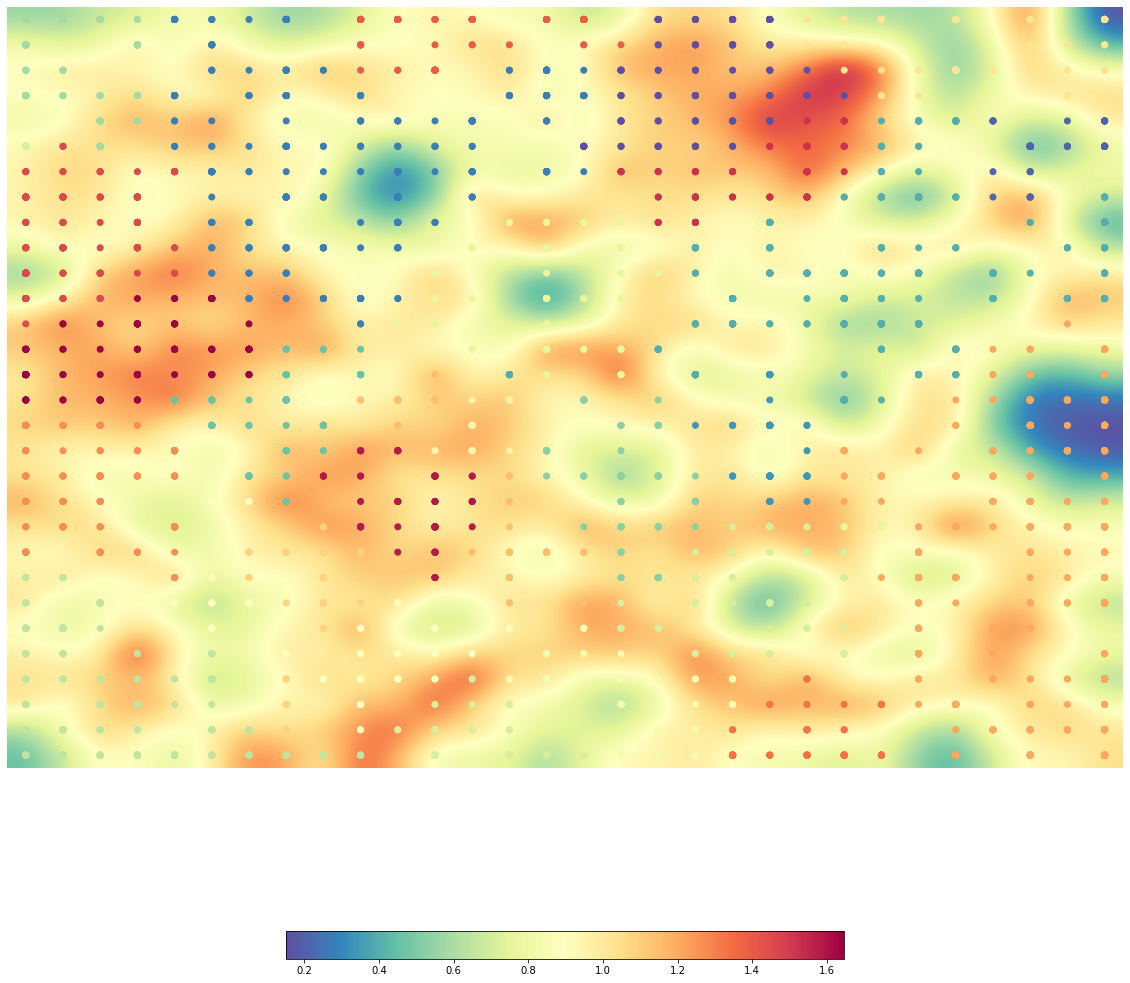

[[ 7  7  7  7  2  2  2  2 20 20 20 20 20 20 20 20 20  0  0  0  0 14 14 14
  14 14 14 14 14 14]
 [ 7  7  7  7  7  2  2  2 20 20 20 20 20 20 20 20 20  0  0  0  0 14 14 14
  14 14 14 14 14 14]
 [ 7  7  7  7  2  2  2  2  2 20 20 20 20  2  2  2  0  0  0  0  0  0 14 14
  14 14 14 14 14 14]
 [ 7  7  7  7  2  2  2  2  2  2  2 20  2  2  2  2  0  0  0  0  0  0  0 14
  14 14 14 14 14 14]
 [ 7  7  7  7  2  2  2  2  2  2  2  2  2  2  2  0  0  0  0  0  0 22 22  4
   4  4  1  1  1  1]
 [ 9 21  7 21  2  2  2  2  2  2  2  2  2  2  2  0  0  0  0  0 22 22 22  4
   4  4  1  1  1  1]
 [21 21 21 21 21  2  2  2  2  2  2  2  2  2  2  2 22 22 22 22 22 22 22  4
   4  4  1  1  1  1]
 [21 21 21 21 21  2  2  2  2  2  2  2  2  2  2 10 22 22 22 22 22 22  4  4
   4  4  1  1  4  4]
 [21 21 21 21 21  2  2  2  2  2  2  2  2 10 10 10 10 22 22 22  4  4  4  4
   4  4  4  4  4  4]
 [21 21 21 21 21  2  2  2  2  2  2  2 10 10 10 10 10 10  4  4  4  4  4  4
   4  4  4  4  4  4]
 [21 21 21 21 21  2  2  2  2  2  2 10 10 10 10 10 

In [ ]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(20,20))
print(som.clusters)
_ , no_of_neurons = np.unique(som.clusters, return_counts=True)
cluster_index = np.argsort(no_of_neurons)
print("Cluster Index:")
print(cluster_index)
print("Number of Neurons:")
print(no_of_neurons[cluster_index])


## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης με το tf-idf και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
   

Ακολοθούμε την διαδικασία όπως περιγράφεται παραπάνω σαν υπόδειξη. Έτσι ορίζουμε την συνάρτηση print_categories_stats που επιστρέφει για ένα σύνοο ταινιών ομαδοποιημένες τις κατηγορίες των ταινιών, την συνάρτηση print_cluster_neurons_movies_report η οποία εμφανίζει για ένα cluster τους νευρώνες που ανήκουν σε αυτό και τέλος την neuron_movies_report που με βοήθεια τις άλλες δυο τυπώνει τις πληθικότητες των κατηγοριών εντός ενός cluster.   

In [ ]:
def print_categories_stats(movie_list):
    
    total_categories = []

    for movie in movie_list:
        categs = categories[movie][0]
        categs = categs.split(',')

        for number_of_categs in categs:
            number_of_categs = number_of_categs.strip(' ')
            number_of_categs = number_of_categs.strip('"')
            total_categories.append(number_of_categs)


    total_categories = np.unique(total_categories,return_counts=True)
    inds = np.argsort(total_categories[1])[::-1]
    answer = []
    for index in inds:
        answer.append((total_categories[0][index],total_categories[1][index]))
        # print(total_categories[0][index],":",total_categories[1][index])
    print(answer)
    return

In [ ]:
print_categories_stats([i for i in range(5000)])

[('Drama', 2211), ('Comedy', 1282), ('Romance Film', 811), ('Thriller', 794), ('Action', 683), ('World cinema', 581), ('Crime Fiction', 522), ('Horror', 517), ('Black-and-white', 454), ('Short Film', 429), ('Indie', 418), ('Family Film', 408), ('Action/Adventure', 408), ('Adventure', 396), ('Romantic drama', 310), ('Animation', 302), ('Science Fiction', 298), ('Musical', 287), ('Romantic comedy', 266), ('Mystery', 249), ('Fantasy', 229), ('Comedy film', 225), ('Crime Thriller', 190), ('War film', 168), ('Period piece', 158), ('Japanese Movies', 152), ('Comedy-drama', 151), ('Silent film', 149), ('Film adaptation', 148), ('Psychological thriller', 132), ('Bollywood', 131), ('Documentary', 120), ('Western', 108), ('Teen', 108), ('Chinese Movies', 105), ('Parody', 101), ('Family Drama', 101), ("Children's/Family", 99), ('Television movie', 97), ('Sports', 94), ('Coming of age', 92), ('Black comedy', 91), ('Supernatural', 87), ('Slasher', 82), ('Suspense', 79), ('Melodrama', 74), ('Cult', 

In [ ]:
def print_cluster_neurons_movies_report(cluster_index):
    neurons_number = no_of_neurons[cluster_index]
    positions = np.where(som.clusters == cluster_index)
    stack_positions = np.column_stack((positions[0],positions[1]))
    inds = []
    for position in stack_positions:
          if position in bmus:
              inds.append(int(position[0]) * n_rows + int(position[1]))
    return inds


In [ ]:
print_cluster_neurons_movies_report(17)

[387,
 388,
 389,
 416,
 417,
 418,
 419,
 446,
 447,
 448,
 449,
 475,
 476,
 477,
 478,
 479,
 504,
 505,
 506,
 507,
 508,
 509,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 592,
 593,
 594,
 595,
 596,
 597,
 598,
 599,
 624,
 625,
 626,
 627,
 628,
 629,
 654,
 655,
 656,
 657,
 658,
 659,
 683,
 684,
 685,
 686,
 687,
 688,
 689,
 713,
 714,
 715,
 716,
 717,
 718,
 719,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 773,
 774,
 775,
 776,
 777,
 778,
 779,
 803,
 804,
 805,
 806,
 807,
 808,
 809,
 834,
 835,
 836,
 837,
 838,
 839,
 864,
 865,
 866,
 867,
 868,
 869,
 894,
 895,
 896,
 897,
 898,
 899]

In [ ]:
def neuron_movies_report(neuron_list):
    neuron_movies = []
    for neuron_id in neuron_list:
        temporary_array = np.where(indices == neuron_id)
        for i in range(temporary_array[0].shape[0]):
            neuron_movies.append(temporary_array[0][i])

    print_categories_stats(neuron_movies)

In [ ]:
for i in list(cluster_index):
    if i !=
    print()
    print("Cluster ID" , i)
    print()
    neuron_movies_report(print_cluster_neurons_movies_report(i))



Cluster ID 13

[('Black-and-white', 15), ('Silent film', 15), ('Indie', 14), ('Romance Film', 8), ('Drama', 7), ('Short Film', 6), ('World cinema', 5), ('Musical', 5), ('Animation', 4), ('Family Film', 3), ('Anime', 3), ('Western', 3), ('Action', 3), ('Fantasy', 2), ('Science Fiction', 2), ('Comedy', 2), ('Documentary', 2), ('Music', 1), ('Chinese Movies', 1), ("Children's/Family", 1), ("Children's Entertainment", 1), ("Children's", 1), ('Family Drama', 1), ('Teen', 1), ('Biography', 1), ('Biographical film', 1), ('B-Western', 1), ('Television movie', 1), ('Tragedy', 1), ('Adventure', 1), ('Action/Adventure', 1), ('Bollywood', 1)]

Cluster ID 1

[('Thriller', 54), ('Horror', 39), ('Comedy', 32), ('Psychological thriller', 29), ('Mystery', 19), ('Parody', 17), ('Slasher', 17), ('Crime Thriller', 15), ('Black comedy', 15), ('Indie', 14), ('Drama', 12), ('Cult', 11), ('Teen', 11), ('Suspense', 9), ('Horror Comedy', 8), ('Slapstick', 7), ('Political cinema', 7), ('Political satire', 6), (


## Tips για το SOM και το clustering

- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix.
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.




## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook (η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας).

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 

1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.
2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.
3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.



Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.


### Δεδομενα με μεγάλη πυκνότητα

Ορίζουμε την συνάρτηση num_of_neurons_for_category η οποία μετρα σε πόσους νευρώνες εμφανίζεται ως dominant (ανάμεσα στις 3 μεγαλύτερες πληθικότητες) μία κατηγορία. Όπως αναμένουμε η κατηγορίες Drama και Comedy που εφανίζονται στο 1/3 του dataset η καθεμία, κυριαρχούν σε πολλούς νευρώνες. Εν γένει η συμπεριφορά είναι ανάλογη, καθώς μειώνεται ο αριθμός ταινιών της εκάστοτε κατηγορίας μειώνονται και οι νευρώνες στους οποίους κυριαρχεί.

In [ ]:
def num_of_neurons_for_category(Category):
    num_of_neurons = 0
    # num_of_movies = 0
    for neuron in range(30 * 30):
        list_of_movies = list(np.where(indices==neuron))
        total_categories = []
        for item in list_of_movies[0].tolist():
            categs = categories[item][0] 
            categs = categs.split(',')
            for number_of_categs in categs:
                number_of_categs = number_of_categs.strip(' ')
                number_of_categs = number_of_categs.strip('"')
                total_categories.append(number_of_categs)
        total_categories = np.unique(total_categories,return_counts=True)
        inds = np.argsort(total_categories[1])[::-1]
        
        for i in range(min(3,len(inds))):
            index = inds[i]
            if(total_categories[0][index] == Category):
                num_of_neurons += 1
                # num_of_movies += total_categories[1][index]
    print("Category",Category,"was found in",num_of_neurons, "neurons.")
    # print(num_of_movies)

In [ ]:
for category in ['Comedy','Drama','Action','Science Fiction','Musical','Black-and-white',"Bollywood","Computer Animation"]:
    num_of_neurons_for_category(category)

Category Comedy was found in 140 neurons.
Category Drama was found in 208 neurons.
Category Action was found in 62 neurons.
Category Science Fiction was found in 41 neurons.
Category Musical was found in 37 neurons.
Category Black-and-white was found in 34 neurons.
Category Bollywood was found in 7 neurons.
Category Computer Animation was found in 1 neurons.


### Μακρινά πρότυπα εισόδου

Ορίζουμε την συνάρτηση plot_neurons_for_2_categories η οποία υπολογίζει τους νευρώνες που ανήκουν (με την ίδια λογική που περγράψαμε προηγουμένως) σε μία από 2 κατηγορίες και με scatter plot παρουσιάζει την τοπολογία των 2 κατηγοριών. Αρχικώς προβάλουμε τα Drama και Comedy και παρατηρούμε οτι 
1. οι δύο μεγαλύτερες κατηγορίες καταλαμβάνουν πολύ μεγάλο χώρο στο χάρτη και 
2. κατέχουν αντιδιαμετρικές περιοχές (πράγμα που υποδεικνύει πως η διαδικασία εκπαίδευσης είχε μια μερική επιτυχία).

Στην συνέχεια εξετάζουμε και άλλες περιπτώσεις αντικρουόμενων κατηγοριών (Thriller, Adventure), (Family Film, Horror) και παρατηρούμε ότι πράγματι βρίσκονται σε διαφορετικές περιοχές τοπολογικά και δεν εμφανίζουν κοινούς νευρώνες. 

In [ ]:
import matplotlib.pyplot as plt

def plot_neurons_for_2_categories(Category1,Category2):
    num_of_neurons = 0
    categ_1_x = []
    categ_1_y = []
    categ_2_x = []
    categ_2_y = []
    for neuron in range(30 * 30):
        list_of_movies = list(np.where(indices==neuron))
        total_categories = []
        for item in list_of_movies[0].tolist():
            categs = categories[item][0] 
            categs = categs.split(',')
            for number_of_categs in categs:
                number_of_categs = number_of_categs.strip(' ')
                number_of_categs = number_of_categs.strip('"')
                total_categories.append(number_of_categs)
        total_categories = np.unique(total_categories,return_counts=True)
        inds = np.argsort(total_categories[1])[::-1]
        
        for i in range(min(3,len(inds))):
            index = inds[i]
            if(total_categories[0][index] == Category1):
                [x,y] = list(ubmus[neuron])
                categ_1_x.append(x)
                categ_1_y.append(y)
            if(total_categories[0][index] == Category2):
                [x,y] = list(ubmus[neuron])
                categ_2_x.append(x)
                categ_2_y.append(y)
    plt.scatter(categ_1_x, categ_1_y, label = Category1, color = 'r', alpha = .3)
    plt.scatter(categ_2_x, categ_2_y, label = Category2, color = 'b', alpha = .3)
    plt.legend(loc = 'best')
    plt.title("Topology of Neurons for 2 Categories")
    plt.show()
    return

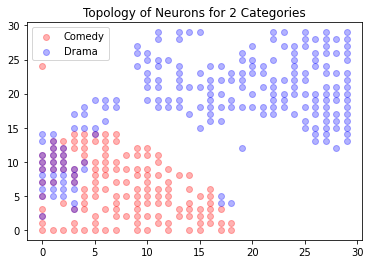

In [ ]:
plot_neurons_for_2_categories('Comedy','Drama')

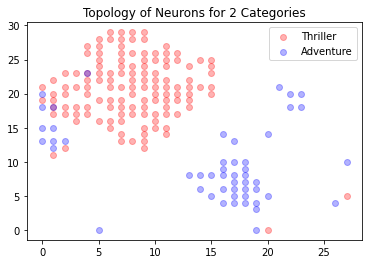

In [ ]:
plot_neurons_for_2_categories('Thriller','Adventure')

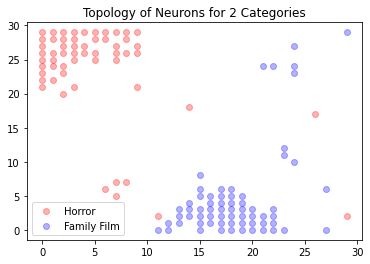

In [ ]:
plot_neurons_for_2_categories('Horror','Family Film')

### Κοντινά πρότυπα εισόδου

Επαναχρησιμοποιούμε την παραπάνω συνάρτηση, αυτή τη φορά για να ανακαλύψουμε την τοπολογία κοντινών κατηγοριών. Αρχικά εξετάζουμε περιπτώσεις υποκατηγοριών όπως Thriller και Psychological thriller όπου βλέπουμε την εμφανή σχέση υποσυνόλου. Στην συνέχεια εξετάζουμε κοντινές νοηματικά κατηγορίες όπως (Horror,Thriller) και (Animation,Family film,Short Film) ο οποίες αποτυπώνονται στο SOM και κοντινές τοπολογικά από ότι φαίνεται.

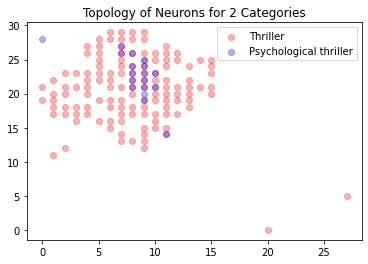

In [ ]:
plot_neurons_for_2_categories("Thriller", 'Psychological thriller')

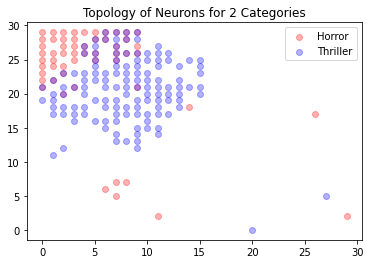

In [ ]:
plot_neurons_for_2_categories("Horror","Thriller")

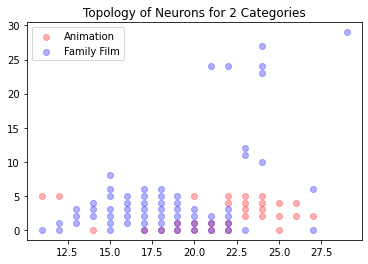

In [ ]:
plot_neurons_for_2_categories("Animation", "Family Film")

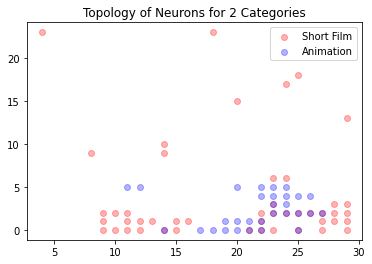

In [ ]:
plot_neurons_for_2_categories("Short Film","Animation")

### Ανάλυση των Clusters
Όπως είναι αναμενόμενο τα clusters χωρίζονται σε ποιοτικά και μη ποιοτικά. Θα αξιολογήσουμε ορισμένα από τα έκδηλα παραδείγματα:


Το cluster #22 έχει κακή συμπεριφορά, ενώνει πολλά ήδη ταινιών που δεν σχετίζονται συνεκτικά μεταξύ τους (Thriller με Comedy, Black White και Crime Fiction)

In [ ]:
Cluster_ID = 22
print("Cluster ID" , Cluster_ID)
print()
neuron_movies_report(print_cluster_neurons_movies_report(Cluster_ID))

Cluster ID 22

[('Thriller', 83), ('Comedy', 70), ('Black-and-white', 36), ('Crime Fiction', 34), ('Crime Thriller', 27), ('Drama', 27), ('Mystery', 23), ('Musical', 20), ('Psychological thriller', 19), ('World cinema', 15), ('Action/Adventure', 15), ('Action', 14), ('Suspense', 13), ('Slapstick', 12), ('Parody', 11), ('Horror', 10), ('Satire', 8), ('Science Fiction', 7), ('Indie', 7), ('Gangster Film', 5), ('Political thriller', 5), ('Japanese Movies', 5), ('Musical comedy', 4), ('Film noir', 4), ('Romance Film', 4), ('Sports', 3), ('Action Thrillers', 3), ('Supernatural', 3), ('Fantasy', 3), ('Detective fiction', 2), ('Detective', 2), ('Crime Comedy', 2), ('Comedy of Errors', 2), ('Short Film', 2), ('Screwball comedy', 2), ('Surrealism', 2), ('Adventure Comedy', 2), ('Black comedy', 2), ('Western', 2), ('War film', 1), ('Crime Drama', 1), ('Adventure', 1), ('Courtroom Drama', 1), ('Comedy-drama', 1), ('Comedy of manners', 1), ('Alien Film', 1), ('Buddy film', 1), ('Auto racing', 1), 

Το cluster #4 αποτελεί άλλο ένα κακό παράδειγμα. Αδυνατεί να να διαφοροποιήσει τις κατηγορίες Drama Romance Comedy και Thriller.

In [ ]:
Cluster_ID = 4
print("Cluster ID" , Cluster_ID)
print()
neuron_movies_report(print_cluster_neurons_movies_report(Cluster_ID))

Cluster ID 4

[('Drama', 260), ('Romance Film', 193), ('Comedy', 171), ('Thriller', 113), ('World cinema', 110), ('Romantic drama', 104), ('Family Film', 86), ('Adventure', 80), ('Crime Fiction', 75), ('Action', 66), ('Horror', 52), ('Western', 49), ('Science Fiction', 44), ('Short Film', 44), ('Mystery', 42), ('Action/Adventure', 39), ('Fantasy', 38), ('Indie', 37), ('Animation', 37), ("Children's/Family", 35), ('Period piece', 35), ('Black-and-white', 34), ('Crime Thriller', 34), ('Musical', 25), ('Film adaptation', 23), ('Detective', 21), ('Detective fiction', 20), ('Family-Oriented Adventure', 18), ('Coming of age', 17), ('Psychological thriller', 17), ('Supernatural', 13), ('Crime Drama', 13), ('Family Drama', 13), ('Gangster Film', 13), ('Biographical film', 12), ("Children's", 12), ('Melodrama', 11), ('Television movie', 11), ('Political drama', 10), ('Sports', 10), ('Fantasy Adventure', 10), ('Japanese Movies', 10), ('War film', 10), ('Biography', 10), ('Comedy-drama', 9), ('Su

Από την άλλη το cluster #0 είναι μια πολύ καλή ομαδοποίηση ταινιών τρόμου, δράσης και επιστημονικής φαντασίας. 


In [ ]:
Cluster_ID = 0
print("Cluster ID" , Cluster_ID)
print()
neuron_movies_report(print_cluster_neurons_movies_report(Cluster_ID))

Cluster ID 0

[('Horror', 86), ('Action', 86), ('Thriller', 81), ('Action/Adventure', 69), ('Science Fiction', 65), ('Comedy', 56), ('Drama', 48), ('Crime Fiction', 28), ('World cinema', 25), ('Black-and-white', 23), ('Adventure', 22), ('Romance Film', 21), ('Supernatural', 20), ('Parody', 18), ('Indie', 17), ('Romantic comedy', 17), ('Fantasy', 16), ('Slasher', 13), ('B-movie', 13), ('Comedy-drama', 12), ('Superhero movie', 11), ('Superhero', 10), ('Spy', 9), ('Suspense', 9), ('Cult', 8), ('Musical', 8), ('Disaster', 8), ('Psychological thriller', 7), ('War film', 7), ('Japanese Movies', 6), ('Mystery', 6), ('Creature Film', 6), ('Western', 6), ('Action Thrillers', 6), ('Film adaptation', 6), ('Crime Thriller', 6), ('Black comedy', 6), ('Buddy film', 5), ('Doomsday film', 5), ('Satire', 5), ('Sci-Fi Horror', 5), ('Monster movie', 4), ('Zombie Film', 4), ('Television movie', 4), ('Teen', 4), ('Natural horror films', 4), ('Action Comedy', 4), ('Adventure Comedy', 4), ('Family Film', 4),

Το cluster #1 αποτελεί μία καλή ομαδοποιήση. Φαίνεται πως έχει συγκεντρώσει ταινίες Horror και Thriller.

In [ ]:
Cluster_ID = 1
print("Cluster ID" , Cluster_ID)
print()
neuron_movies_report(print_cluster_neurons_movies_report(Cluster_ID))

Cluster ID 1

[('Thriller', 54), ('Horror', 39), ('Comedy', 32), ('Psychological thriller', 29), ('Mystery', 19), ('Parody', 17), ('Slasher', 17), ('Crime Thriller', 15), ('Black comedy', 15), ('Indie', 14), ('Drama', 12), ('Cult', 11), ('Teen', 11), ('Suspense', 9), ('Horror Comedy', 8), ('Slapstick', 7), ('Political cinema', 7), ('Political satire', 6), ('Satire', 4), ('Film noir', 4), ('Gross out', 3), ('Film adaptation', 3), ('World cinema', 3), ('Erotic thriller', 3), ('Haunted House Film', 3), ('Black-and-white', 3), ('Zombie Film', 3), ('Gross-out film', 3), ('Absurdism', 3), ('Supernatural', 3), ('Stoner film', 3), ('Science Fiction', 3), ('Television movie', 3), ('Crime Comedy', 2), ('Sci-Fi Horror', 2), ('Sports', 2), ('B-movie', 2), ('Action', 2), ('Buddy film', 1), ('Animation', 1), ('Comedy Thriller', 1), ('Comedy of manners', 1), ('Adventure', 1), ('Costume drama', 1), ('Creature Film', 1), ('Chinese Movies', 1), ('Martial Arts Film', 1), ('Media Satire', 1), ('Detective'

Το cluster #3 επίσης αποτελεί μία καλή ομαδοποιήση. Φαίνεται πως έχει συγκεντρώσει παιδικές ταινίες (Animation) και εν γένει οικογενειακές.

In [ ]:
Cluster_ID = 3
print("Cluster ID" , Cluster_ID)
print()
neuron_movies_report(print_cluster_neurons_movies_report(Cluster_ID))

Cluster ID 3

[('Animation', 81), ('Short Film', 54), ('Drama', 32), ('Comedy film', 27), ('Family Film', 17), ('World cinema', 14), ('Romance Film', 11), ('Black-and-white', 11), ('Japanese Movies', 11), ('Anime', 10), ('Indie', 10), ('War film', 9), ('Action', 9), ('Adventure', 8), ('Science Fiction', 7), ('Stop motion', 7), ('Musical', 6), ('Action/Adventure', 6), ("Children's", 5), ('Silent film', 5), ("Children's/Family", 5), ('Art film', 4), ('Fantasy', 4), ('Historical fiction', 3), ('Romantic drama', 3), ('Thriller', 2), ('Television movie', 2), ("Children's Fantasy", 2), ('Animated cartoon', 2), ('Culture & Society', 2), ('Computer Animation', 2), ('Costume drama', 2), ('Crime Fiction', 2), ('Chinese Movies', 2), ('Family Drama', 2), ('Swashbuckler films', 1), ('Christmas movie', 1), ('Comedy', 1), ('Bollywood', 1), ("Children's Entertainment", 1), ('Black comedy', 1), ('Biography', 1), ('Biographical film', 1), ('Avant-garde', 1), ('Anti-war film', 1), ('Anti-war', 1), ('Trag

Ακόμη το cluster #7 είναι αρκετά ικανοποιητικό. Φαίνεται πως έχει συγκεντρώσει τις κατηγοριές ρομαντικών ταινιών.

In [ ]:
Cluster_ID = 7
print("Cluster ID" , Cluster_ID)
print()
neuron_movies_report(print_cluster_neurons_movies_report(Cluster_ID))

Cluster ID 7

[('Comedy', 130), ('Romance Film', 90), ('Romantic comedy', 85), ('Drama', 60), ('Indie', 37), ('Action/Adventure', 28), ('Action', 27), ('World cinema', 24), ('Comedy-drama', 17), ('Coming of age', 16), ('Teen', 15), ('Adventure', 14), ('Thriller', 13), ('Black comedy', 11), ('Chinese Movies', 10), ('Parody', 10), ('Romantic drama', 10), ('Martial Arts Film', 9), ('Musical', 8), ('Sex comedy', 8), ('Ensemble Film', 7), ('Black-and-white', 6), ('Period piece', 6), ('Television movie', 6), ('Satire', 6), ('Cult', 6), ('Slapstick', 6), ('Sports', 6), ('Crime Fiction', 6), ('Comedy of manners', 5), ('Fantasy', 4), ('Horror', 4), ('Screwball comedy', 4), ('Comedy of Errors', 4), ('Gross-out film', 3), ('Bollywood', 3), ('Gross out', 3), ('Workplace Comedy', 3), ('Superhero movie', 3), ('Adventure Comedy', 2), ('Americana', 2), ('Action Comedy', 2), ('Crime Comedy', 2), ('Silent film', 2), ('Road movie', 2), ('Domestic Comedy', 2), ('Music', 2), ('Family Film', 2), ('Political

Τέλος ένα μικρό cluster με εξαιρετικό ενδιαφέρον φαίνεται πως είναι το cluster #13. Αυτό φαίνεται να έχει συγκεντρώσει διαφορετικές κατηγορίες πέρα τον δημοφιλών Comedy-Drama-Thriller, και θα λέγαμε πως αντιπροσωπεύει μια κατηγορία πιο κουλτουριάρικων ταινιών (Black & White, Silent Film, Indie, Short Film).  

In [ ]:
Cluster_ID = 13
print("Cluster ID" , Cluster_ID)
print()
neuron_movies_report(print_cluster_neurons_movies_report(Cluster_ID))

Cluster ID 13

[('Black-and-white', 15), ('Silent film', 15), ('Indie', 14), ('Romance Film', 8), ('Drama', 7), ('Short Film', 6), ('World cinema', 5), ('Musical', 5), ('Animation', 4), ('Family Film', 3), ('Anime', 3), ('Western', 3), ('Action', 3), ('Fantasy', 2), ('Science Fiction', 2), ('Comedy', 2), ('Documentary', 2), ('Music', 1), ('Chinese Movies', 1), ("Children's/Family", 1), ("Children's Entertainment", 1), ("Children's", 1), ('Family Drama', 1), ('Teen', 1), ('Biography', 1), ('Biographical film', 1), ('B-Western', 1), ('Television movie', 1), ('Tragedy', 1), ('Adventure', 1), ('Action/Adventure', 1), ('Bollywood', 1)]



# Τελική παράδοση άσκησης

- Θα παραδώσετε στο eclass το παρόν notebook επεξεργασμένο ή ένα νέο με τις απαντήσεις σας για τα ζητούμενα και των δύο εφαρμογών. 
- Θυμηθείτε ότι η ανάλυση του χάρτη στο markdown με αναφορά σε αριθμούς clusters πρέπει να αναφέρεται στον τελικό χάρτη με τα κελιά ορατά που θα παραδώσετε αλλιώς ο χάρτης που θα προκύψει θα είναι διαφορετικός και τα labels των clusters δεν θα αντιστοιχούν στην ανάλυσή σας. 
- Μην ξεχάσετε στην αρχή ένα κελί markdown με **τα στοιχεία της ομάδας σας**.
- Στο **zip** που θα παραδώσετε πρέπει να βρίσκονται **2 αρχεία (το .ipynb και το .py του notebook σας)**.

<table>
  <tr><td align="center">
    <font size="4">Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα!</font>
</td>
  </tr>
</table>